# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson

### (1) Definition of probability intervals for assumed probability density function

Assuming Poisson probability distribution

In [2]:
# Return value of n corresponsing to upper (one-side) limit on given CL
# Use 1-CL for lower limit

def problim(mean,cl):
    
# Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = poisson.isf(1-cl,mean)

    return xlim 

# Help function to check coverage

def probsum(mean,n1,n2):
    nn = np.arange(n1,n2+1)
    pn=poisson.pmf(nn,mean)
    return np.sum(pn)

In [3]:
# Bayesian limit

def bayeslim(nm,cl):
    
    # numerical integration settings
    
    mmin = 0.0
    mmax = nm+1+15*np.sqrt(nm+1.0)
    mbin = 2000
    
    dm = (mmax-mmin)/mbin
    mval = np.linspace(mmin+dm/2,mmax-dm/2,mbin)
    dp = dm*poisson.pmf(nm,mval)
    
    pint = np.sum(dp)   # Should be 1, if no constraints
    
    psum = 0
    mlim = mmin
    
    for im in range(mbin):
        psum+=dp[im]/pint
        if(psum>cl):
            mlim = mval[im]-dm/2
            break
#        print(mval[im],sval[im],dp[im],psum)  # Debug output
    
    return mlim


### (2) Define set of hypothesis

In [6]:
# Considered values of true mean

# vmean = np.linspace(0.5,15.,30)
# vmean = np.linspace(0.1,15.,150)
vmean = np.linspace(0.02,15.,750)

CL = 0.95            # One sided! So the inteval will be 90% CL

# Upper an lower edges of x probability intervals

vhig = problim(vmean,CL)
vlow = problim(vmean,1-CL)

# Values of measured n (for Bayesian curve)

vmeas = np.linspace(0.,15.,16)

vbay = np.empty(vmeas.size)

for im in range(vmeas.size):
    vbay[im] = bayeslim(vmeas[im],CL)


### (3)  Print Bayes interval information

In [7]:
print("\n Bayes upper limit for true mean:")

print("\n  Observed      mu_ul       CL")

for im in range(vmeas.size) :
    bcl = 1 - probsum(vbay[im],0,vmeas[im])
    print ("%10d   %8.3f       %8.6f" % (vmeas[im],vbay[im],bcl))



 Bayes upper limit for true mean:

  Observed      mu_ul       CL
         0      2.992       0.949813
         1      4.735       0.949653
         2      6.289       0.949745
         3      7.752       0.949945
         4      9.153       0.949999
         5     10.493       0.949421
         6     11.835       0.949795
         7     13.136       0.949683
         8     14.418       0.949579
         9     15.680       0.949375
        10     16.949       0.949692
        11     18.197       0.949763
        12     19.421       0.949516
        13     20.652       0.949641
        14     21.855       0.949350
        15     23.066       0.949367


### (4) Draw probability intervals

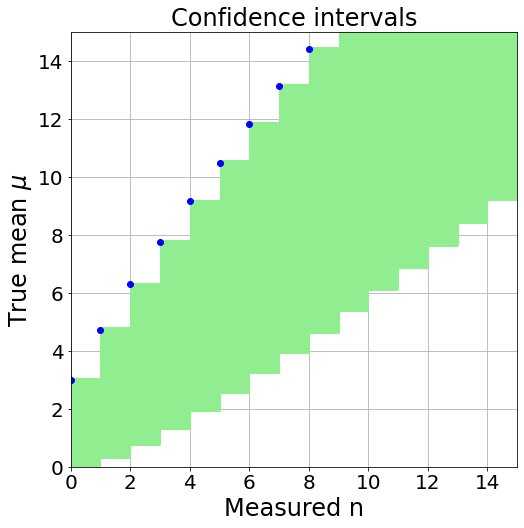

In [10]:
# Frame range

Xmin=0
Xmax=15
Ymin=0
Ymax=15

plt.figure(figsize=(8, 8))

# Probability intervals for n (Frequentist)

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

# Bayes limits for mu

plt.plot(vmeas,vbay,'o',color='blue')


plt.title("Confidence intervals",size=24)
plt.xlabel("Measured n",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')

fname = '07_poisson_bayes.png'
plt.savefig(fname)
